#### Bartosz Piłat, Norbert Gwiazda
# Analiza zbioru *Apartmen Prices in Poland*
*https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/data*


## 1. Przygotowanie zbioru

Na początek powinniśmy zaimportować wszystkie potrzebne pakiety do przeprowadzenia analizy.

In [3]:
!where python

C:\Users\Bcom_\Documents\aaStudia\aDokumentyStudia\PRiAD\projekt\Analiza_danych_rynku_mieszkaniowego\.venv\Scripts\python.exe
C:\Users\Bcom_\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\Bcom_\AppData\Local\Programs\Python\Python310\python.exe


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

sciezka_do_folderu_data="data"

In [5]:
import os
def create_DataFrame_from_data_in_folder(folder_path):
  df = pd.DataFrame()
  row_count = 0
  for file in os.listdir(folder_path):
      if(file.endswith('.csv')):
        tmp = pd.read_csv(folder_path+'/'+file)
        row_count += tmp.shape[0]
        df = pd.concat([df,tmp])

  if(row_count!=df.shape[0]):
    raise Exception("Data from folder was not inserted correctly into DataFrame")
    return
  return df


W celu globalnej analizy danych dane muszą zostać najpierw załadowane do DataFrame'a.

In [6]:
buy_data = create_DataFrame_from_data_in_folder(sciezka_do_folderu_data+'/buy')
rent_data = create_DataFrame_from_data_in_folder(sciezka_do_folderu_data+'/rent')
buy_data.set_index("id", inplace=True)
rent_data.set_index("id", inplace=True)
buy_data = buy_data.loc[~buy_data.index.duplicated(keep='first')]
rent_data = rent_data.loc[~rent_data.index.duplicated(keep='first')]
buy_data.head()
rent_data.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
id,,,,,,,,,,,,,,,,,,,,,
2a1a6db97ff122d6bc148abb6f0e498a,szczecin,blockOfFlats,52.0,2.0,3.0,3.0,2008.0,53.460535,14.545416,4.26,...,0.307,condominium,brick,NaN,yes,yes,no,no,no,3500
5a0cb42c088eadf75aa98a4118640048,szczecin,blockOfFlats,57.0,3.0,NaN,10.0,1976.0,53.440955,14.566024,1.98,...,0.189,condominium,NaN,premium,no,yes,yes,no,no,3000
996722490efcb4b34d48bb84a9a72838,szczecin,NaN,43.4,2.0,3.0,4.0,NaN,53.435746,14.560764,1.37,...,0.211,condominium,NaN,NaN,no,yes,no,no,no,1900
50d75c688530b9a61ba505301e0b94a9,szczecin,apartmentBuilding,32.6,2.0,5.0,6.0,2021.0,53.421582,14.541572,1.30,...,0.192,condominium,brick,premium,no,yes,yes,no,no,2500
9b187f4203adabf466fd08610d8f4e5e,szczecin,apartmentBuilding,72.0,3.0,6.0,6.0,2014.0,53.450010,14.547230,3.10,...,0.315,condominium,brick,premium,no,yes,yes,no,yes,2999


In [7]:
buy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92967 entries, f8524536d4b09a0c8ccc0197ec9d7bde to 42018b7b653cc30ef52d4fc75e47cdac
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  92967 non-null  object 
 1   type                  73175 non-null  object 
 2   squareMeters          92967 non-null  float64
 3   rooms                 92967 non-null  float64
 4   floor                 76983 non-null  float64
 5   floorCount            91885 non-null  float64
 6   buildYear             77326 non-null  float64
 7   latitude              92967 non-null  float64
 8   longitude             92967 non-null  float64
 9   centreDistance        92967 non-null  float64
 10  poiCount              92967 non-null  float64
 11  schoolDistance        92907 non-null  float64
 12  clinicDistance        92634 non-null  float64
 13  postOfficeDistance    92868 non-null  float64
 14  kindergartenDista

Ustawienie prawidłowych typów dla poszczególnych atrybutów.

In [8]:
for col in buy_data.columns:
    print(f"{col} - {buy_data[col].nunique()}")

city - 15
type - 3
squareMeters - 7173
rooms - 6
floor - 27
floorCount - 29
buildYear - 165
latitude - 46449
longitude - 48233
centreDistance - 1487
poiCount - 196
schoolDistance - 2505
clinicDistance - 4263
postOfficeDistance - 2689
kindergartenDistance - 2309
restaurantDistance - 2406
collegeDistance - 4817
pharmacyDistance - 2420
ownership - 3
buildingMaterial - 2
condition - 2
hasParkingSpace - 2
hasBalcony - 2
hasElevator - 2
hasSecurity - 2
hasStorageRoom - 2
price - 7287


In [9]:
dane_kategoryczne = ["city", "type", "ownership", "buildingMaterial"]


buy_data[dane_kategoryczne] = buy_data[dane_kategoryczne].astype("category")
rent_data[dane_kategoryczne] = rent_data[dane_kategoryczne].astype("category")





## 2. Analiza eksploracyjna zbioru

In [10]:
def analize_data(df, data_name):
  print("Analysis of: "+data_name)
  print("Number of objects: ", df.shape[0])
  print("Number of attributes: ", df.shape[1])
  print("Attributes: ", df.columns)
  print("Number of objects with at least 1 missing value: %d" % df.isnull().any(axis=1).sum())
  print("Number of missing values in attributes:")
  missing_val_count_by_column = (df.isnull().sum())
  missing_val= (missing_val_count_by_column[missing_val_count_by_column > 0])
  for column, count in missing_val.items():
    print("  %s: %d  (%.2f%%)" % (column, count, count/df.shape[0]*100))
  print()

In [11]:
analize_data(buy_data, "buy_data")
analize_data(rent_data,"rent_data")

Analysis of: buy_data
Number of objects:  92967
Number of attributes:  27
Attributes:  Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 82056
Number of missing values in attributes:
  type: 19792  (21.29%)
  floor: 15984  (17.19%)
  floorCount: 1082  (1.16%)
  buildYear: 15641  (16.82%)
  schoolDistance: 60  (0.06%)
  clinicDistance: 333  (0.36%)
  postOfficeDistance: 99  (0.11%)
  kindergartenDistance: 85  (0.09%)
  restaurantDistance: 226  (0.24%)
  collegeDistance: 2492  (2.68%)
  pharmacyDistance: 128  (0.14

Przeprowadzamy analizę zbiorów
  
### 2.1 Analiza danych numerycznych

Podział danych na numeryczne i kategoryczne

In [12]:
for col in buy_data.columns:
    print(f"{col} - {buy_data[col].nunique()}")

city - 15
type - 3
squareMeters - 7173
rooms - 6
floor - 27
floorCount - 29
buildYear - 165
latitude - 46449
longitude - 48233
centreDistance - 1487
poiCount - 196
schoolDistance - 2505
clinicDistance - 4263
postOfficeDistance - 2689
kindergartenDistance - 2309
restaurantDistance - 2406
collegeDistance - 4817
pharmacyDistance - 2420
ownership - 3
buildingMaterial - 2
condition - 2
hasParkingSpace - 2
hasBalcony - 2
hasElevator - 2
hasSecurity - 2
hasStorageRoom - 2
price - 7287


In [13]:
numeric_columns = ["squareMeters", "rooms", "floor", "floorCount", "buildYear", "latitude", "longitude", "centreDistance", "poiCount", "schoolDistance", "clinicDistance", "postOfficeDistance", "kindergartenDistance", "restaurantDistance", "collegeDistance", "pharmacyDistance", "price"]
category_columns = ["city", "type", "ownership", "buildingMaterial", "condition", "hasParkingSpace", "hasBalcony", "hasElevator", "hasSecurity", "hasStorageRoom"]

Narysujmy wykresy dla danych w celu lepszego zobrazowania sobie zbioru


In [14]:
buy_data_numerics = buy_data.copy()
rent_data_numerics = rent_data.copy()
buy_data_numerics.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
id,,,,,,,,,,,,,,,,,,,,,
f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


92967
37941


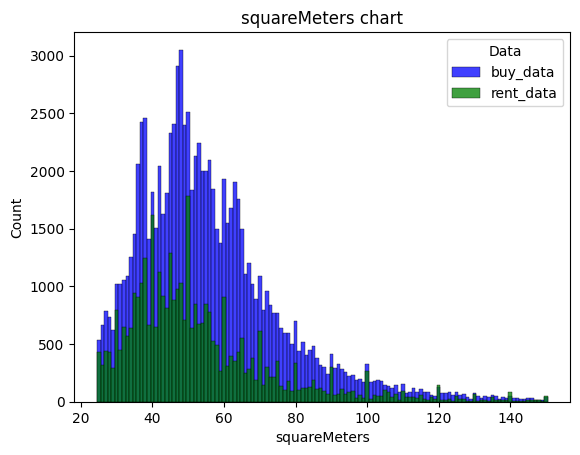

92967
37941


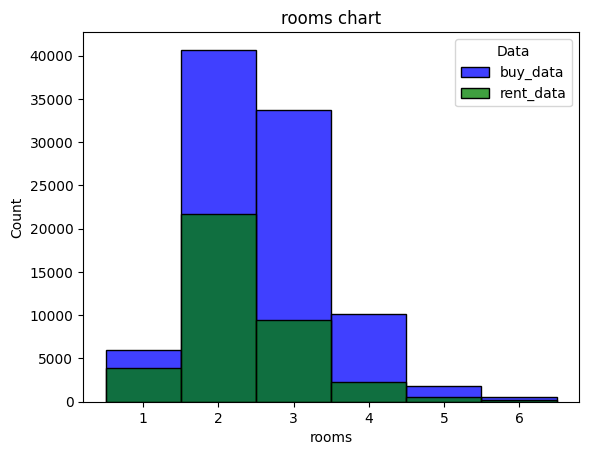

76983
33295


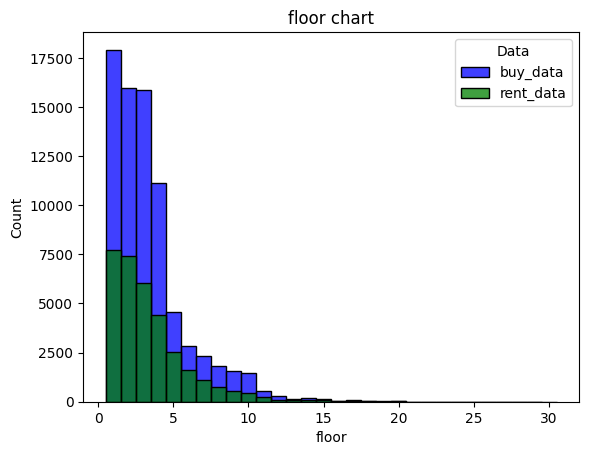

91885
37211


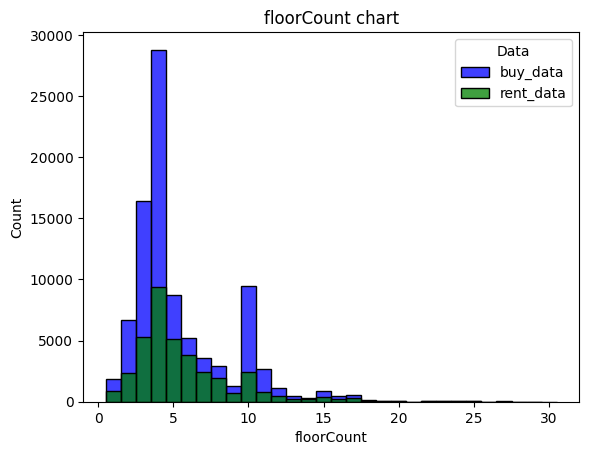

77326
27371


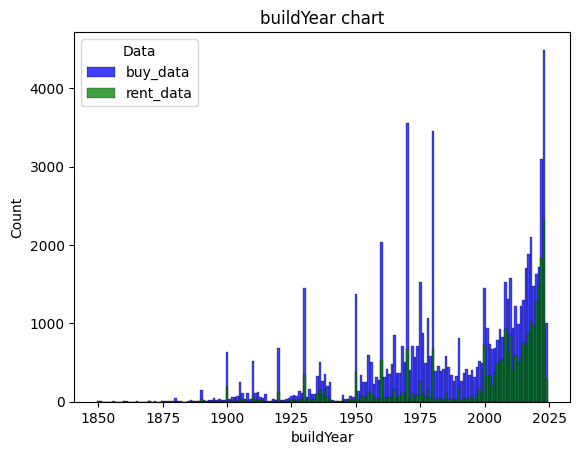

92967
37941


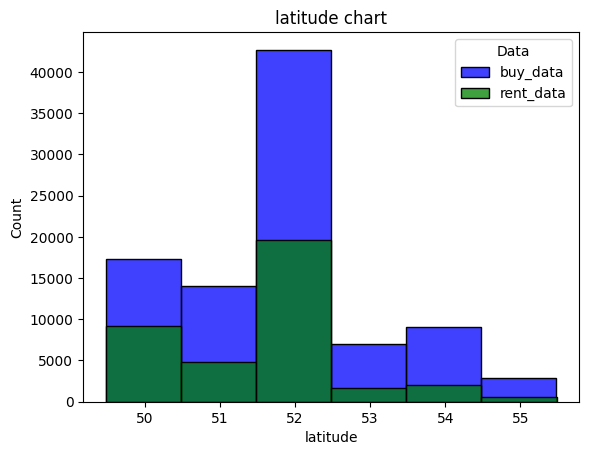

92967
37941


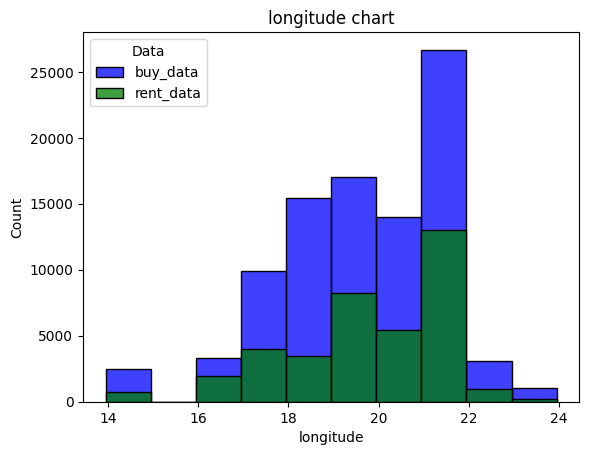

92967
37941


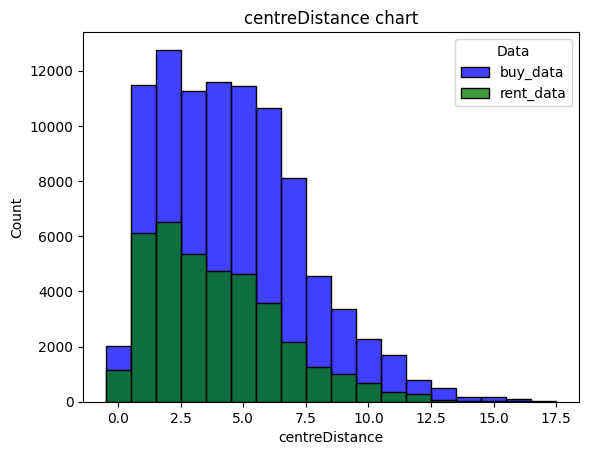

92967
37941


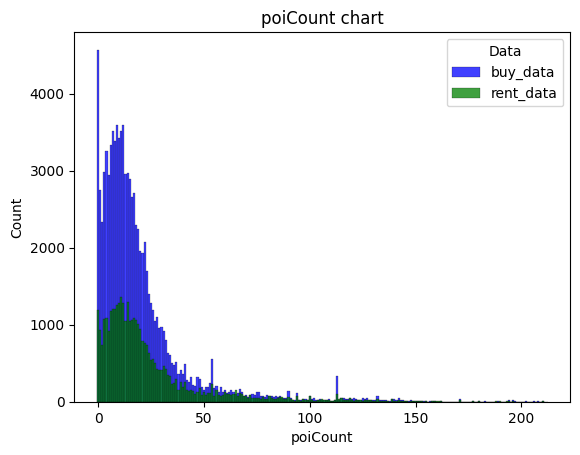

92907
37930


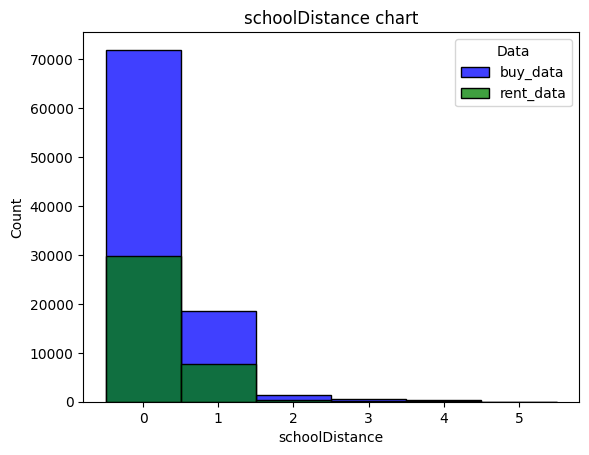

92634
37909


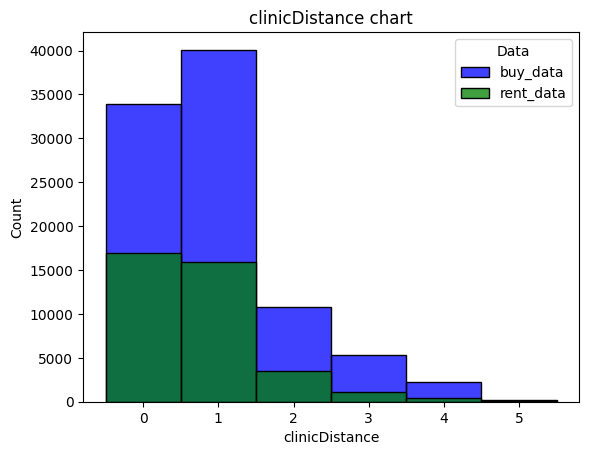

92868
37922


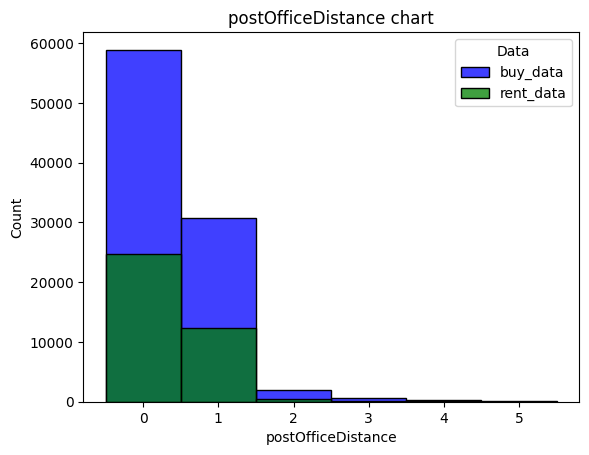

92882
37913


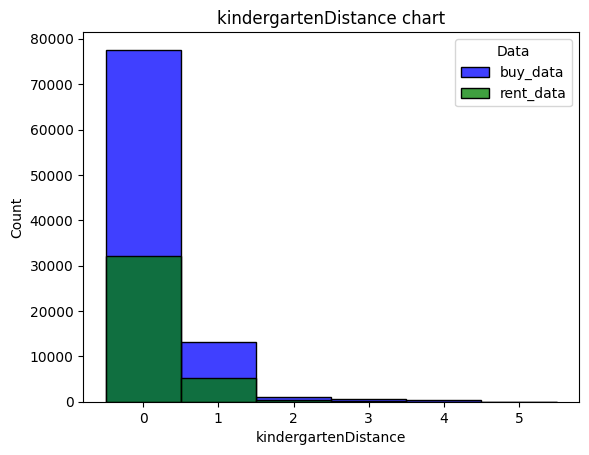

92741
37859


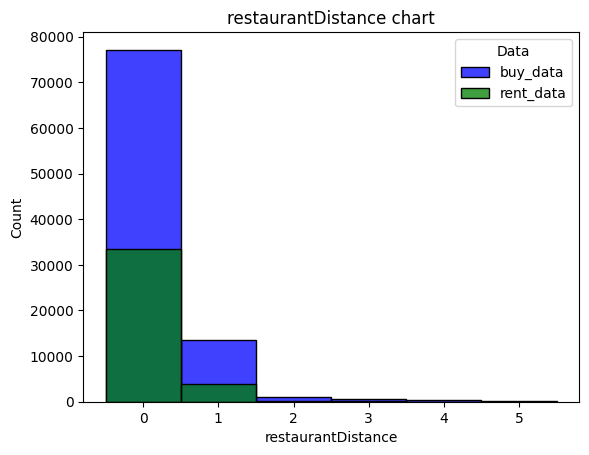

90475
37451


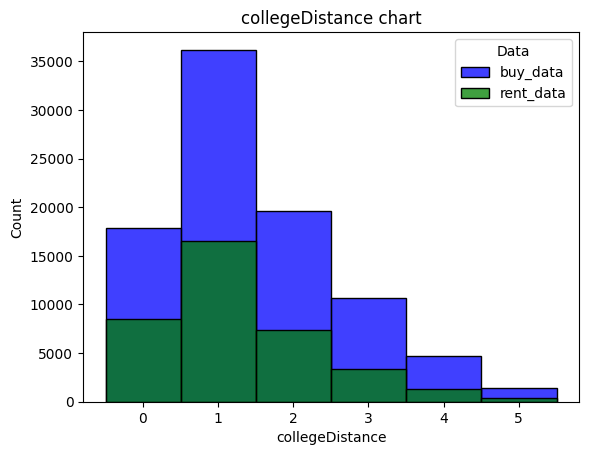

92839
37903


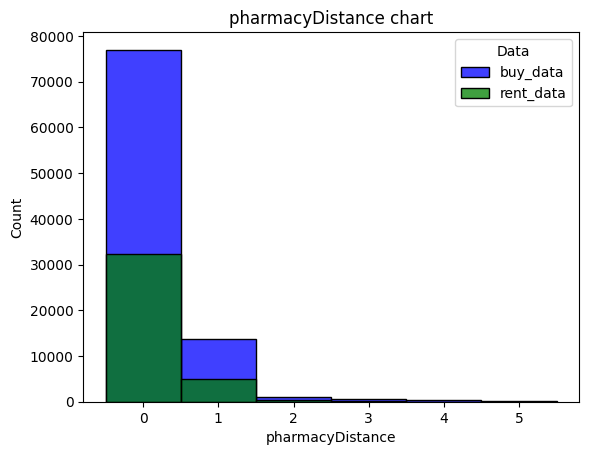

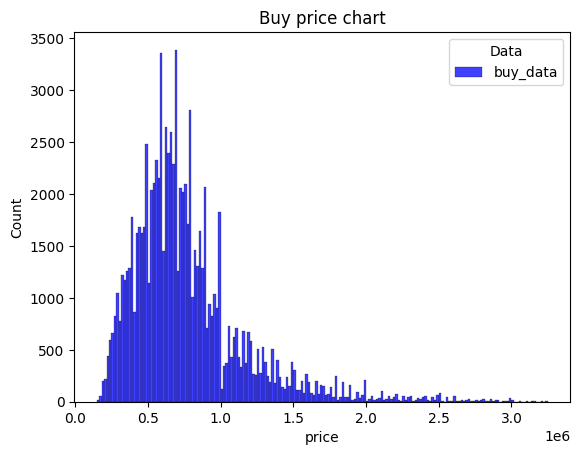

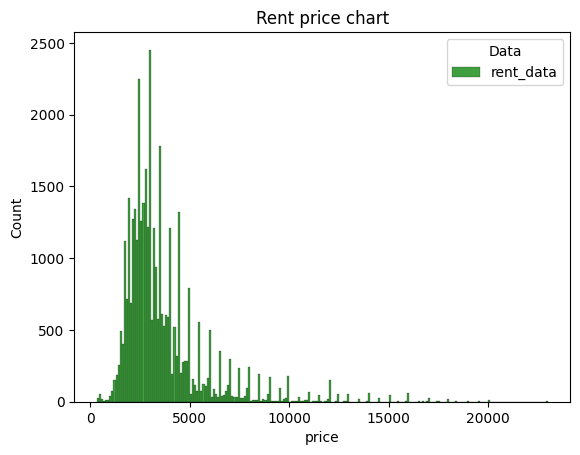

In [15]:
for column in numeric_columns[:-1]:
    buy_tmp = pd.DataFrame(buy_data_numerics[column].dropna())
    rent_tmp = pd.DataFrame(rent_data_numerics[column].dropna())
    print(buy_tmp.shape[0])
    print(rent_tmp.shape[0])
    if column in ["squareMeters", "rooms", "floor", "floorCount", "buildYear", "poiCount", "price"]:
        buy_tmp = buy_tmp.astype("int")
        rent_tmp = rent_tmp.astype("int")
    
    
    num_bins = 50
    sns.histplot(data=buy_tmp, x=column, color="blue", label="buy_data", bins=num_bins, discrete=True)
    sns.histplot(data=rent_tmp, x=column, color="green", label="rent_data", bins=num_bins, discrete=True)

    plt.title(column + " chart")
    plt.legend(title="Data")
    plt.show()

sns.histplot(data=buy_data_numerics, x="price", color="blue", label="buy_data")
plt.title("Buy price" + " chart")
plt.legend(title="Data")
plt.show()
sns.histplot(data=rent_data_numerics, x="price", color="green", label="rent_data")

plt.title("Rent price" + " chart")
plt.legend(title="Data")
plt.show()



W celu analizy zbiorów pod kątem również outlinerów stworzymy boxploty dla poszczególnych atrybutów.

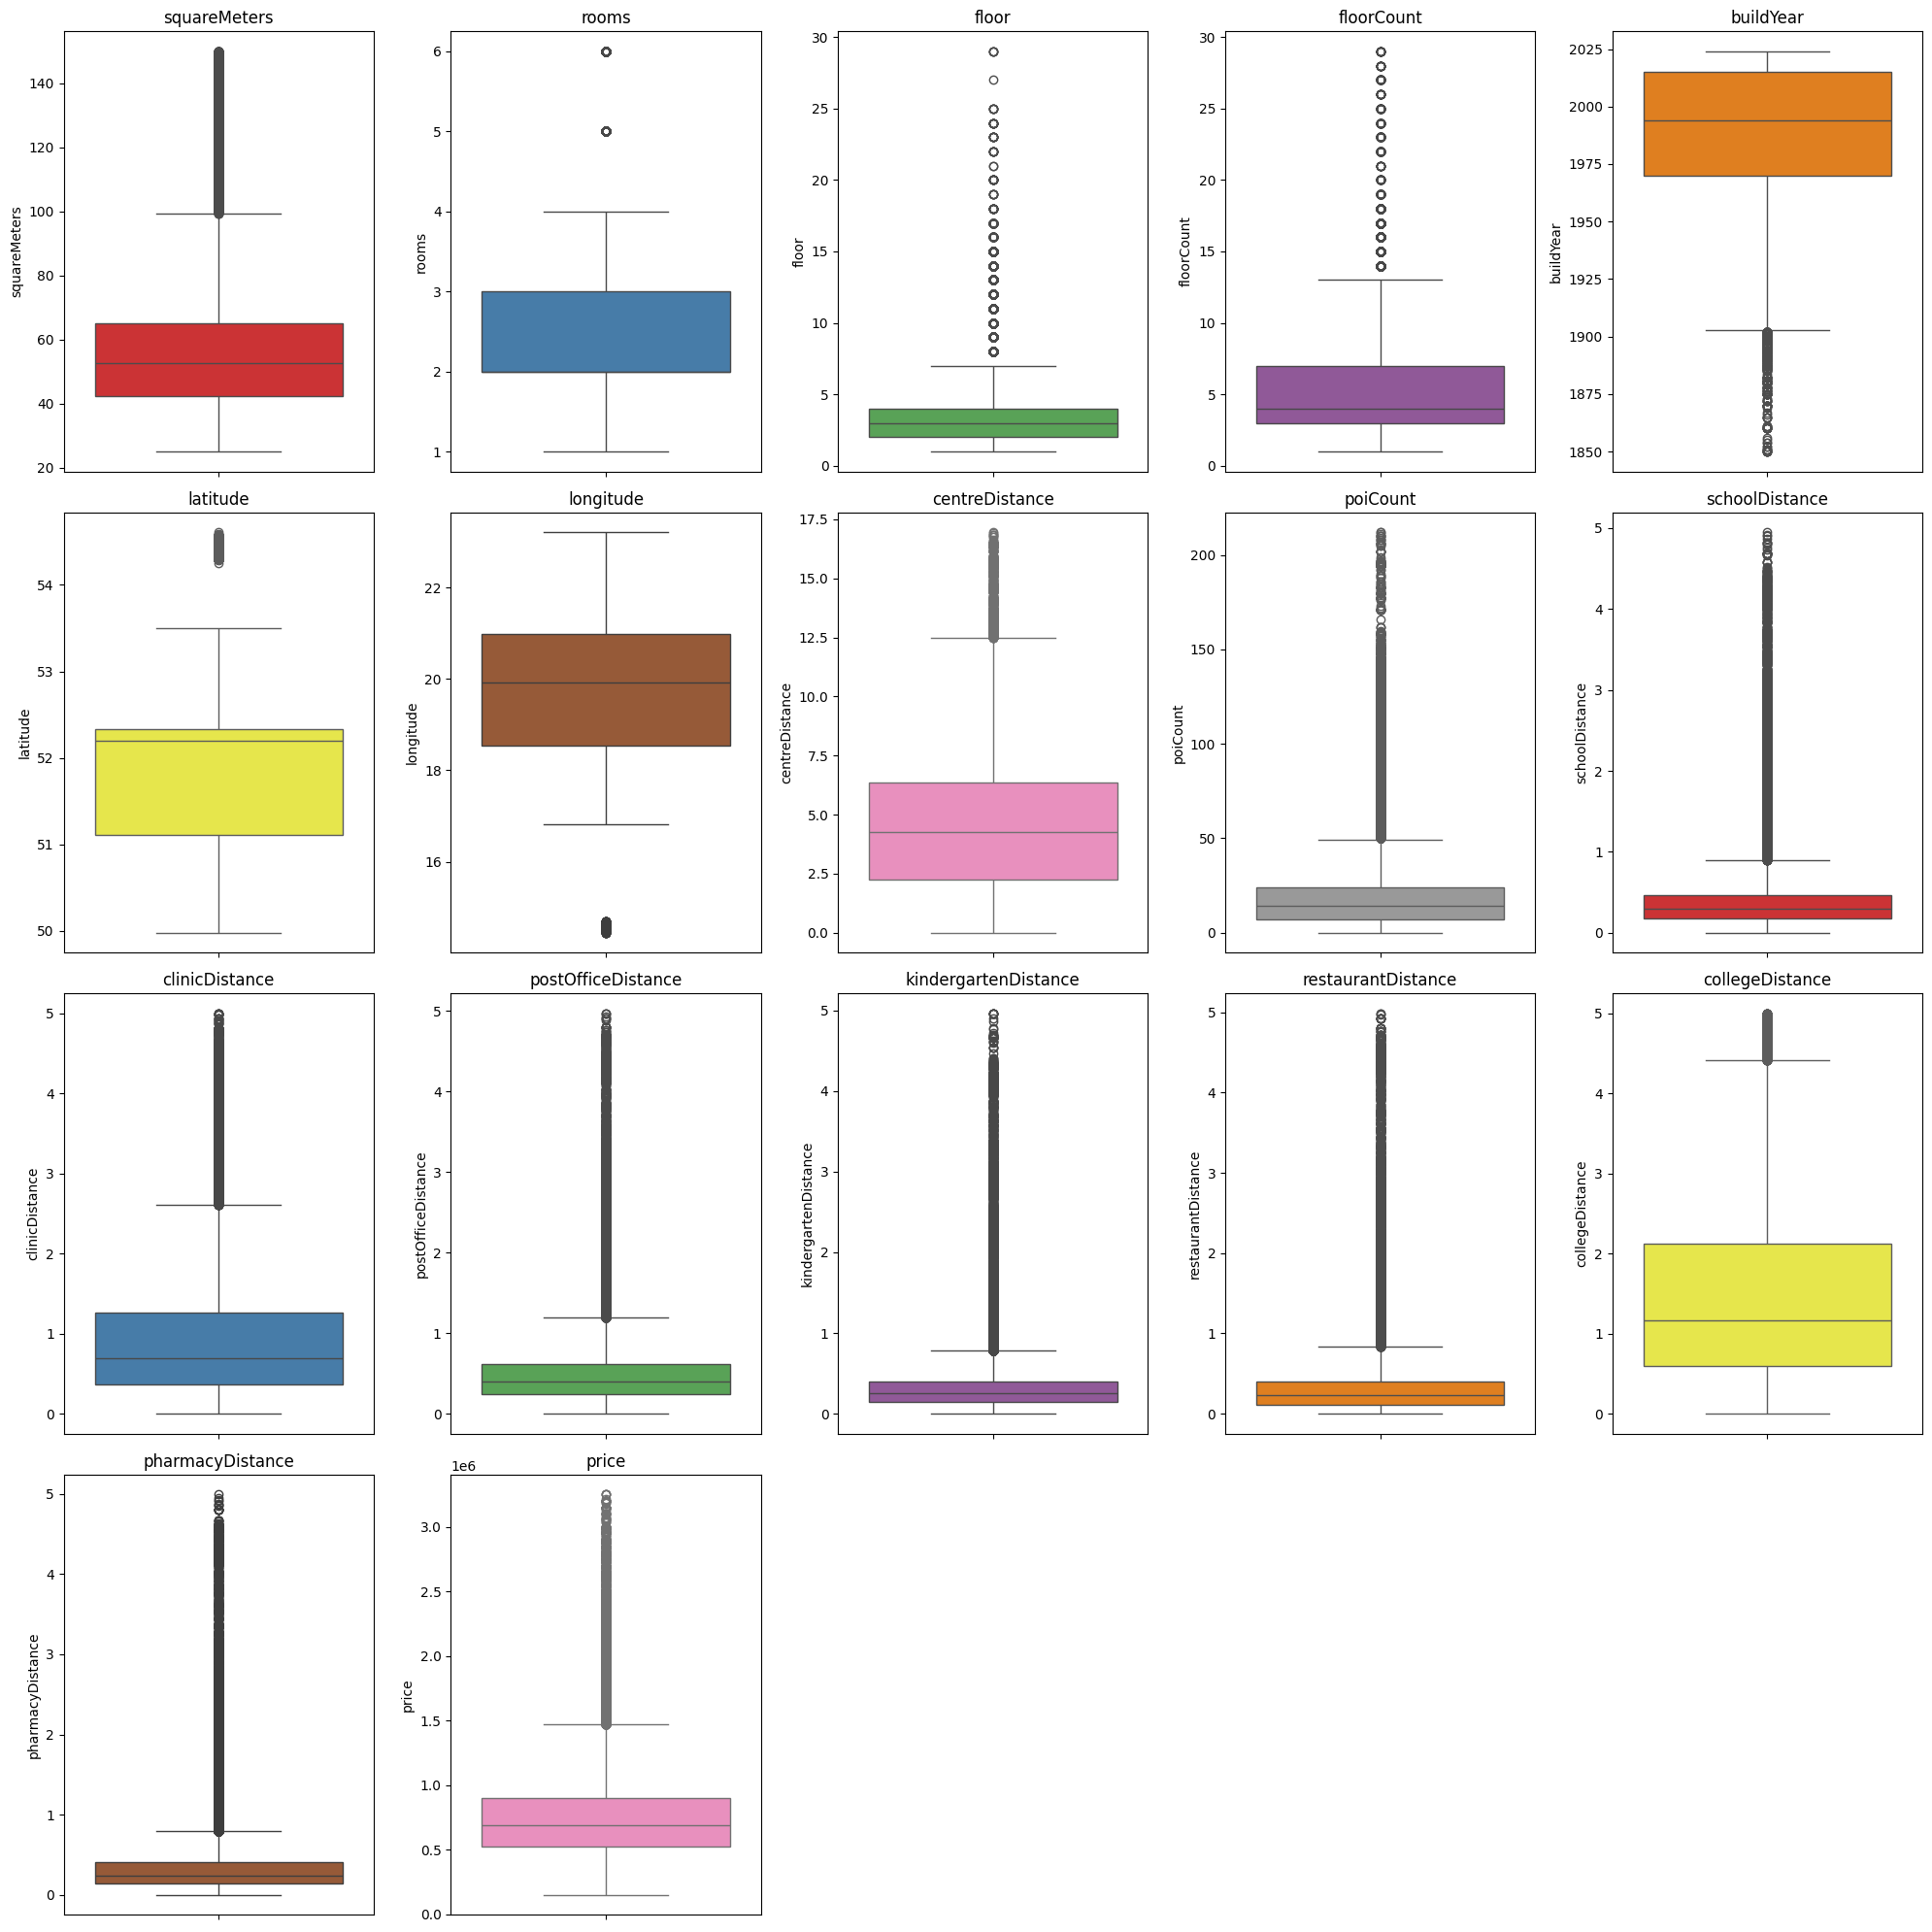

In [16]:
import math

colors = sns.color_palette("Set1", len(numeric_columns))
plt.figure(figsize=(20, 20))
MAX_WIDTH = 5
for i, column in enumerate(numeric_columns):
    plt.subplot(math.ceil(len(numeric_columns) / MAX_WIDTH), MAX_WIDTH, i + 1)
    sns.boxplot(data=buy_data_numerics, y=column, color=colors[i])
    plt.title(column)
    plt.tight_layout()

plt.show()

W poniższym badaniu przeprowadzimy stopień skorelowania poszczególnych wartości z ceną mieszkania.

['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance', 'collegeDistance', 'pharmacyDistance']


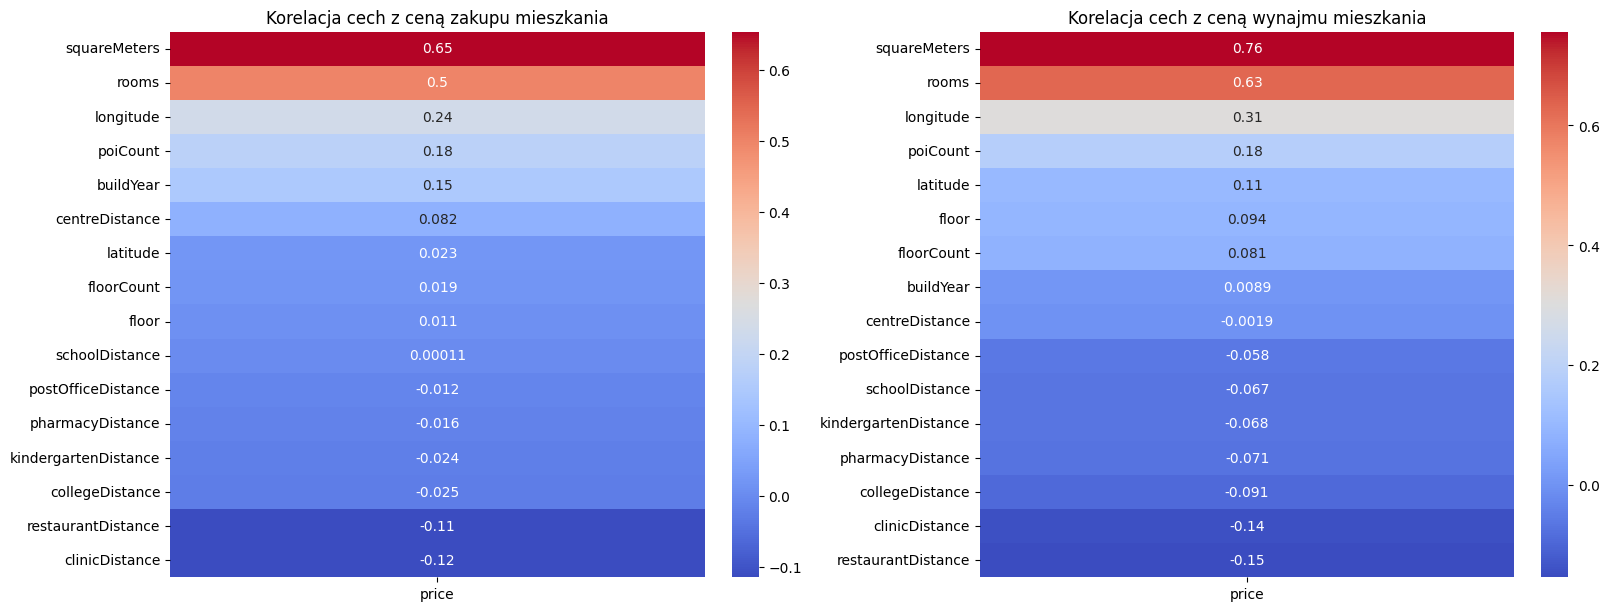

In [17]:

features = numeric_columns[:-1]
print(features)
features_to_buy_price_corr = buy_data[features].apply(lambda col: col.corr(buy_data['price']))
features_to_rent_price_corr = rent_data[features].apply(lambda col: col.corr(rent_data['price']))

buy_price_corr_df = pd.DataFrame(features_to_buy_price_corr, columns=['price']).sort_values(by='price', ascending=False)
rent_price_corr_df = pd.DataFrame(features_to_rent_price_corr, columns=['price']).sort_values(by='price', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

sns.heatmap(buy_price_corr_df, annot=True, cmap="coolwarm", cbar=True, ax=axes[0])
axes[0].set_title("Korelacja cech z ceną zakupu mieszkania")

sns.heatmap(rent_price_corr_df, annot=True, cmap="coolwarm", cbar=True, ax=axes[1])
axes[1].set_title("Korelacja cech z ceną wynajmu mieszkania")
plt.show()

**Wnioski:**

Z danych można zaobserwować, że największy wpływ na wzrost ceny zarówno kupna, jak i wynajmu mieszkania ma jego powierzchnia oraz liczba pokojów. Niewielką korelację można też zaobserwować między ceną zakupu lub wynajmu mieszkania, a szerokością geograficzną na jakiej jest położone oraz liczbą points of interest w pobliżu.

C:\Users\Bcom_\AppData\Local\Temp\ipykernel_18388\1009627013.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


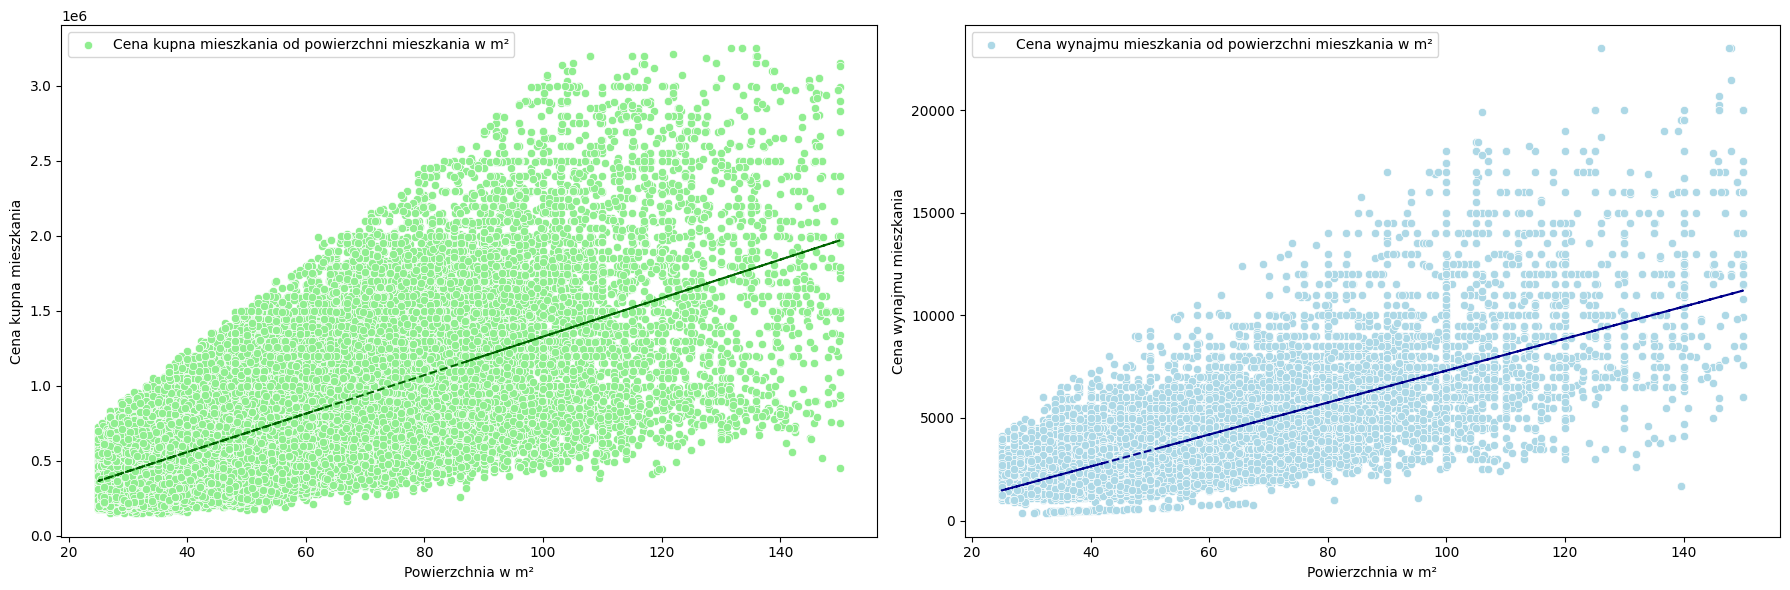

In [18]:
buy_x = buy_data['squareMeters']
rent_x = rent_data['squareMeters']

buy_y = buy_data['price']
rent_y = rent_data['price']

model_buy = LinearRegression()
model_rent = LinearRegression()

model_buy.fit(buy_x.values.reshape(-1,1), buy_y)
model_rent.fit(rent_x.values.reshape(-1,1), rent_y)

buy_trend = model_buy.predict(buy_x.values.reshape(-1,1))
rent_trend = model_rent.predict(rent_x.values.reshape(-1,1))

fig, axes = plt.subplots(1, 2, figsize=(18,6), constrained_layout=True)
sns.scatterplot(x=buy_x,y=buy_y, color='lightgreen', label='Cena kupna mieszkania od powierzchni mieszkania w m²', ax=axes[0])
sns.scatterplot(x=rent_x,y=rent_y, color='lightblue', label='Cena wynajmu mieszkania od powierzchni mieszkania w m²', ax=axes[1])

axes[0].plot(buy_x, buy_trend, color='darkgreen', linestyle='--', label='Linia trendu - Cena kupna mieszkania')
axes[1].plot(rent_x, rent_trend, color='darkblue', linestyle='--', label='Linia trendu - Cena wynajmu mieszkania')

axes[0].set_xlabel('Powierzchnia w m²')
axes[0].set_ylabel('Cena kupna mieszkania')

axes[1].set_xlabel('Powierzchnia w m²')
axes[1].set_ylabel('Cena wynajmu mieszkania')

plt.tight_layout()
plt.show()

Powyżej dwa wykresy punktowe oraz linia trendu wyznaczająca cenę kupna od powierzchni.


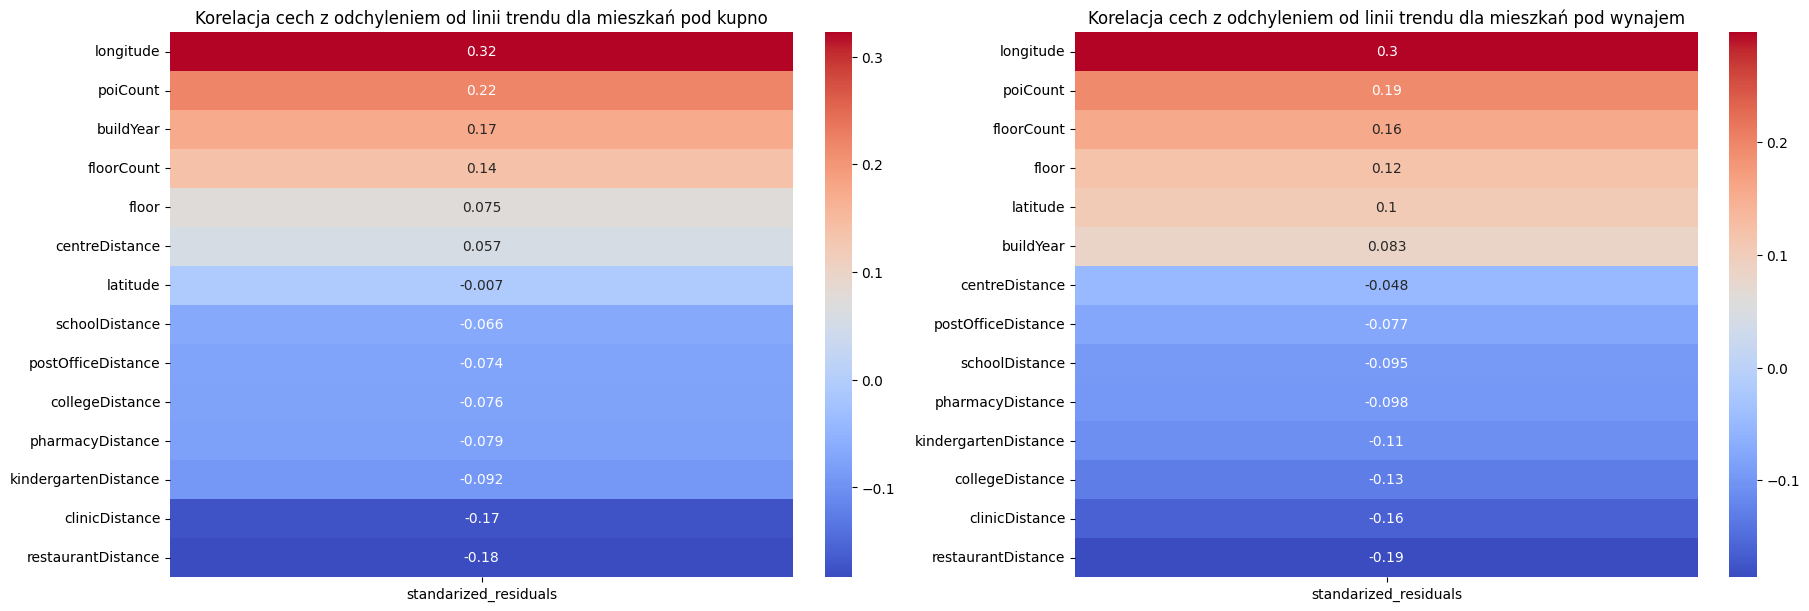

In [19]:
buy_data_residuals = buy_data.copy()
rent_data_residuals = rent_data.copy()
buy_data_residuals['residuals'] = buy_data['price'] - buy_trend
rent_data_residuals['residuals'] = rent_data['price'] - rent_trend

scaler = StandardScaler()

buy_data_residuals['standarized_residuals'] = scaler.fit_transform(buy_data_residuals['residuals'].values.reshape(-1, 1))
rent_data_residuals['standarized_residuals'] = scaler.fit_transform(rent_data_residuals['residuals'].values.reshape(-1, 1))

for x in ['squareMeters', 'rooms']:
  if x in features:
    features.remove(x)

fig, axes = plt.subplots(1, 2, figsize=(18,6), constrained_layout=True)

features_to_buy_std_residuals_corr = buy_data_residuals[features].apply(lambda col: col.corr(buy_data_residuals['standarized_residuals']))
features_to_rent_std_residuals_corr = rent_data_residuals[features].apply(lambda col: col.corr(rent_data_residuals['standarized_residuals']))

buy_residuals_corr_df = pd.DataFrame(features_to_buy_std_residuals_corr, columns=['standarized_residuals']).sort_values(by='standarized_residuals', ascending=False)
rent_residuals_corr_df = pd.DataFrame(features_to_rent_std_residuals_corr, columns=['standarized_residuals']).sort_values(by='standarized_residuals', ascending=False)

sns.heatmap(buy_residuals_corr_df, annot=True, cmap="coolwarm", cbar=True, ax=axes[0])
axes[0].set_title("Korelacja cech z odchyleniem od linii trendu dla mieszkań pod kupno")

sns.heatmap(rent_residuals_corr_df, annot=True, cmap="coolwarm", cbar=True, ax=axes[1])
axes[1].set_title("Korelacja cech z odchyleniem od linii trendu dla mieszkań pod wynajem")


plt.show()


Z powyższej heatmapy wynika, że największą korelacją z pozostałych cech cieszy się szerokość geograficzna na jakiej znajduje się mieszkanie.


C:\Users\Bcom_\AppData\Local\Temp\ipykernel_18388\1054457519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type',y='price', data=buy_data.dropna(), palette='viridis', ax=axes[0])
C:\Users\Bcom_\AppData\Local\Temp\ipykernel_18388\1054457519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city',y='price', data=buy_data, palette='viridis', ax=axes[1])
C:\Users\Bcom_\AppData\Local\Temp\ipykernel_18388\1054457519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ownership',y='price', data=buy_data, palette='viridis', ax=axes[

<Axes: xlabel='ownership', ylabel='price'>

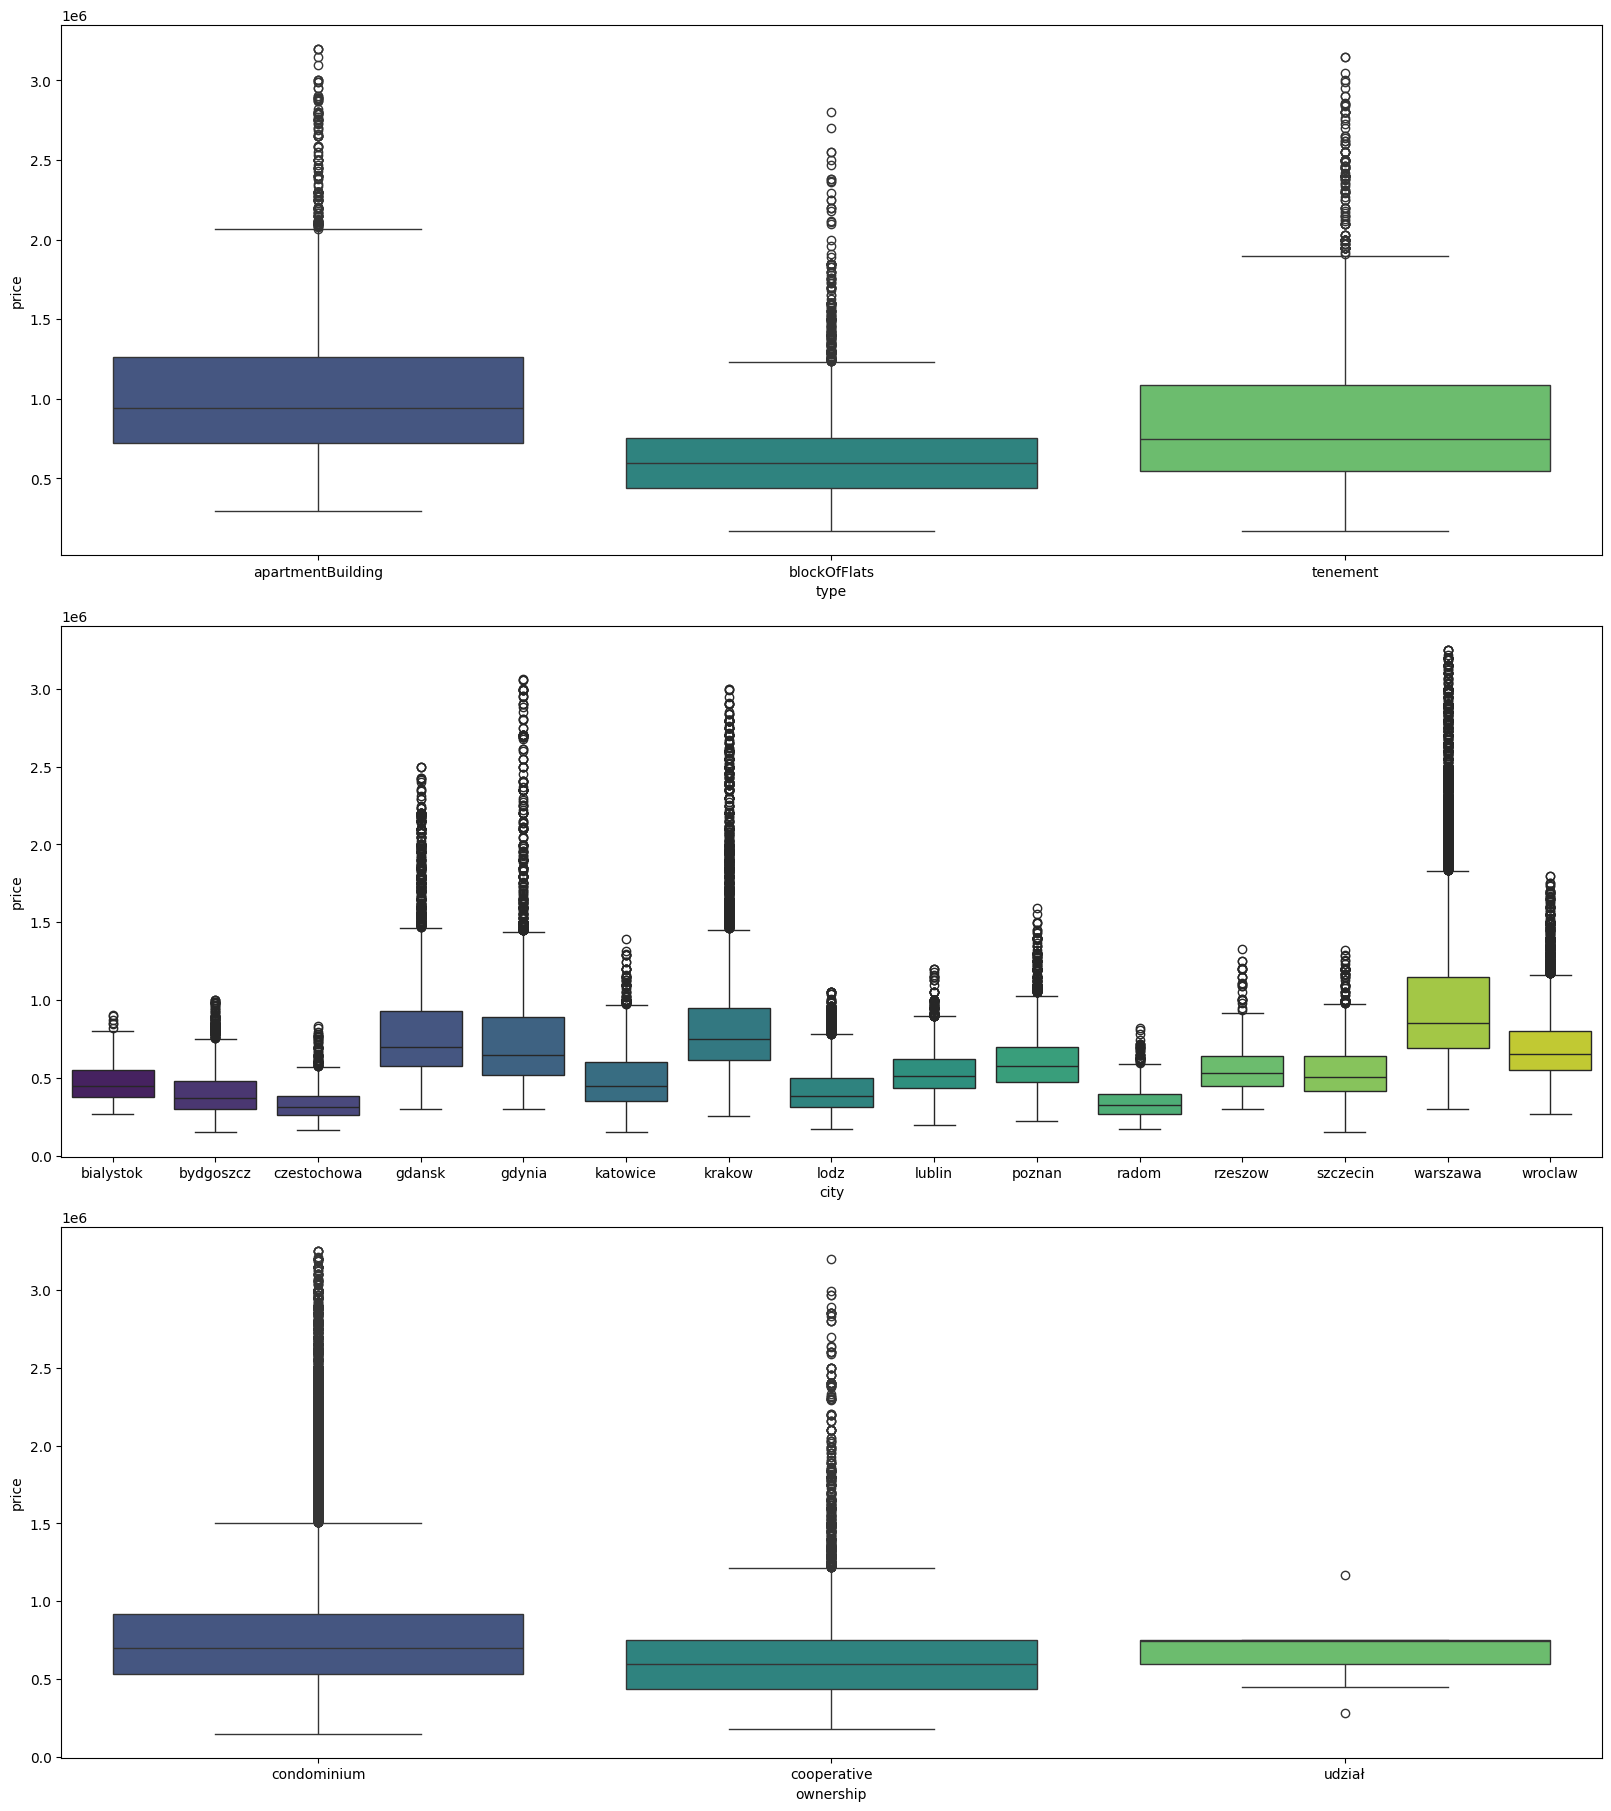

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(16,18), constrained_layout=True)
sns.boxplot(x='type',y='price', data=buy_data.dropna(), palette='viridis', ax=axes[0])
sns.boxplot(x='city',y='price', data=buy_data, palette='viridis', ax=axes[1])
sns.boxplot(x='ownership',y='price', data=buy_data, palette='viridis', ax=axes[2])

Korelacje pomiędzy innymi atrybutami

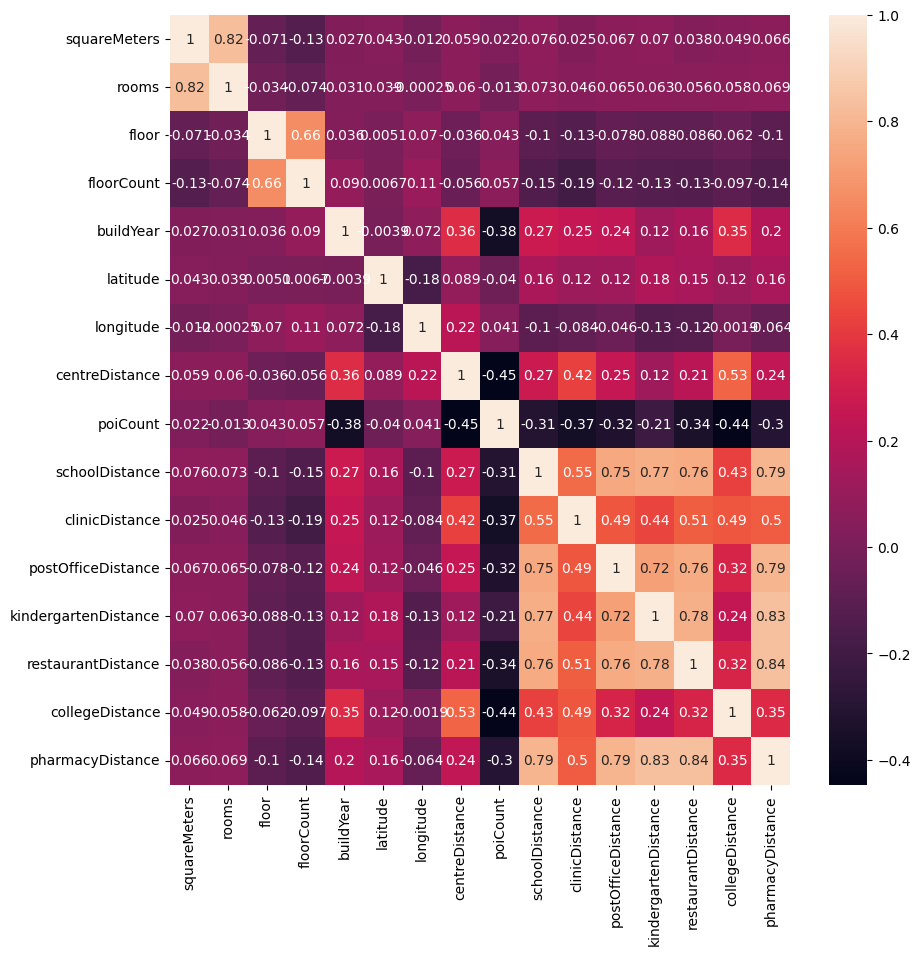

In [21]:
buy_tmp = buy_data[numeric_columns[:-1]].copy()
plt.figure(figsize = (10,10))
sns.heatmap(buy_tmp.corr(),annot = True)
plt.show()

#### 2.2 Analiza danych kategorycznych

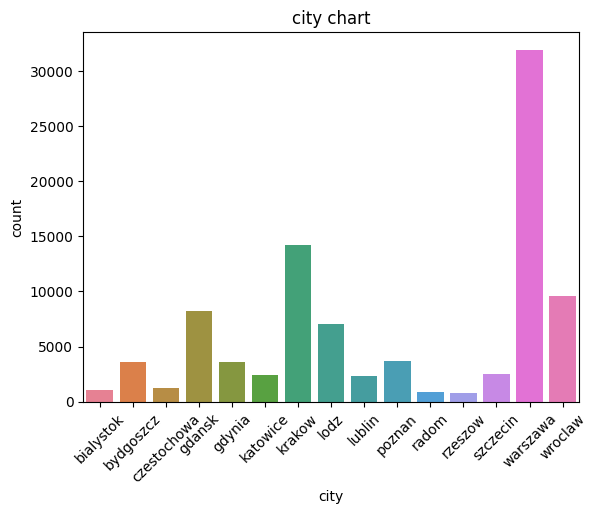

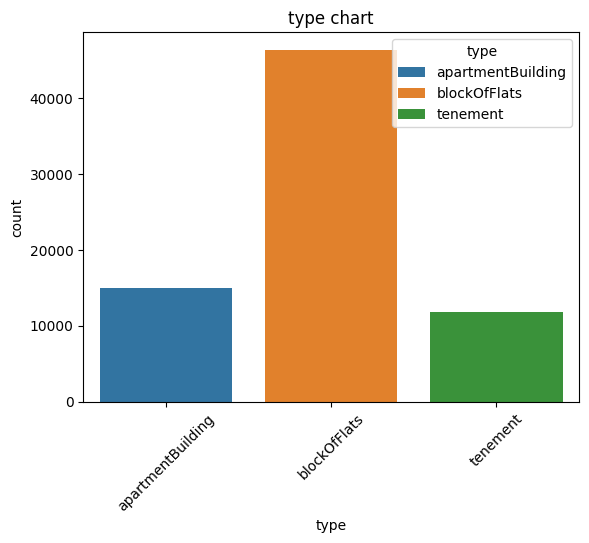

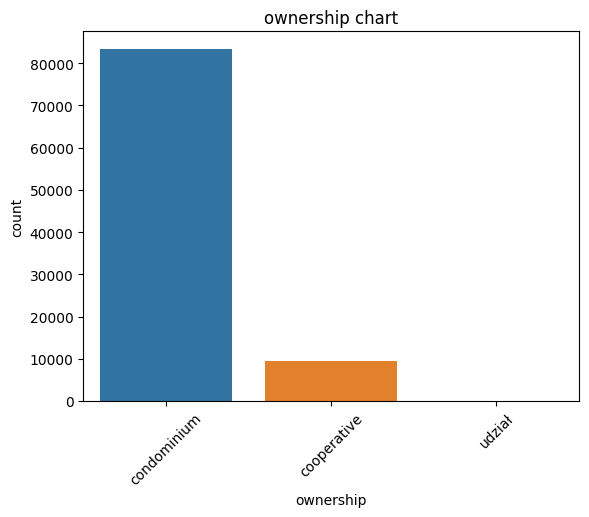

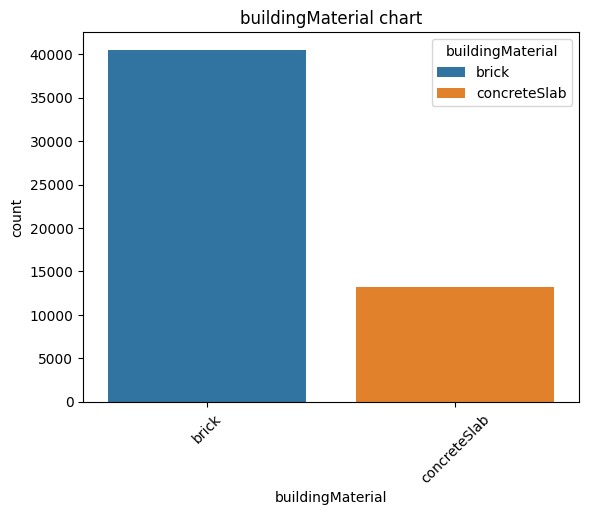

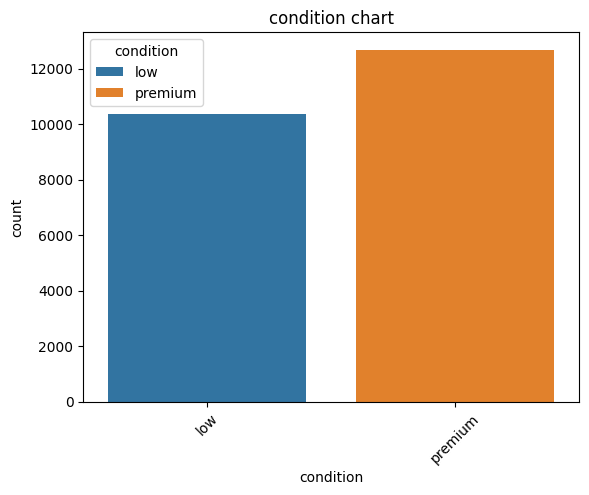

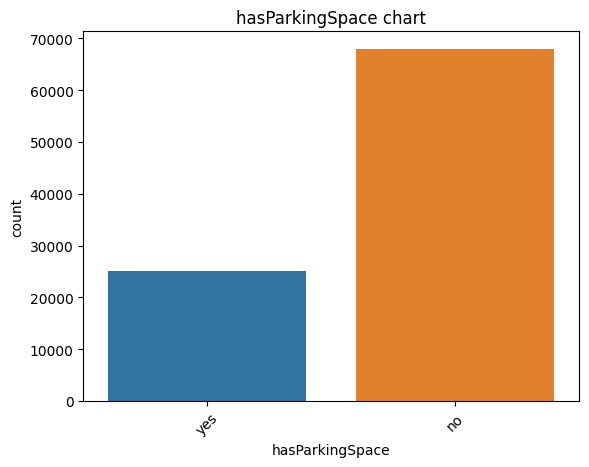

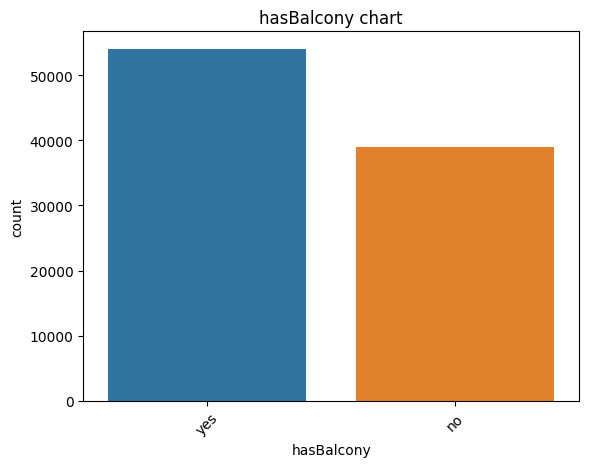

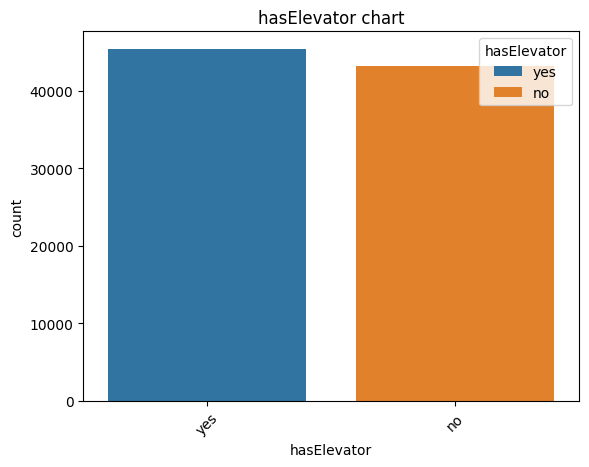

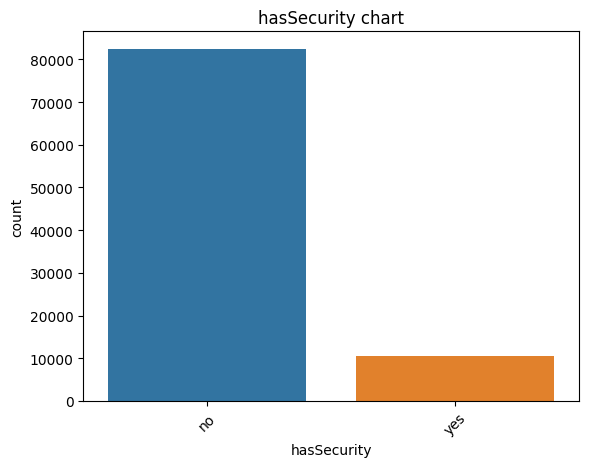

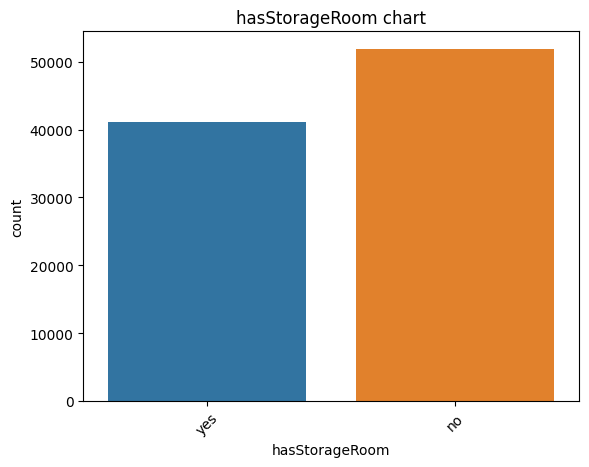

In [22]:
for column in category_columns:
    sns.countplot(data=buy_data, x=column, hue=column)
    plt.xticks(rotation=45)
    plt.title(column+" chart")
    plt.show()

## 3. Czyszczenie danych

Na podstawie przeanalizowanych załadowanych danych możemy rozpocząć czyszczenie danych.  
Jak można przeczytać w opisie zbioru atrybuty z suffixem 'Distance' są określone jedynie w przypadku jeśli odległość od danego punktu jest mnijesza niż 500m. Z tego powodu braki w danych atrybutach można uzupełnić odpowiednio dużą wartością. Na potrzeby tego zbioru braki danych w zbiorach uzupełnimy przy pomocy rozszerzonej imputacji wstawiając wartości 20 (ponieważ 1 w bazie oznacza 100m) w brakujące miejsca i dodatkowo oznaczając wcześniejszy brak danych przy użyciu dodatkowych kolumn.

In [23]:
def extended_imputation_with_fill_value(df, col_name, fill_value):
  if col_name in df.columns:
    df.insert(df.columns.get_loc(col_name)+1, (col_name+'_is_close'),0)
    df[col_name+'_is_close']= ~(df[col_name].isnull())
    df[col_name]=df.loc[:,col_name].fillna(fill_value)
    return df
  print("Attribute %s is not present in specified DataFrame!" % col_name)
  return df

In [24]:
buy_data_clean = buy_data.copy()
rent_data_clean = rent_data.copy()

fill_value = 20
poiList = ['schoolDistance', 'clinicDistance','postOfficeDistance','kindergartenDistance', 'restaurantDistance','collegeDistance','pharmacyDistance']
for column_name in poiList:
  buy_data_clean = extended_imputation_with_fill_value(buy_data_clean, column_name, 20)
  rent_data_clean= extended_imputation_with_fill_value(rent_data_clean, column_name, 20)

analize_data(buy_data_clean, 'buy_data')
analize_data(rent_data_clean,'rent_data')

Analysis of: buy_data
Number of objects:  92967
Number of attributes:  34
Attributes:  Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'schoolDistance_is_close', 'clinicDistance',
       'clinicDistance_is_close', 'postOfficeDistance',
       'postOfficeDistance_is_close', 'kindergartenDistance',
       'kindergartenDistance_is_close', 'restaurantDistance',
       'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 81679
Number of missing values in attributes:
  type: 19792  (21.29%)
  floor: 15984  (17.19%)
  floorCount: 1082  (1.16%)
  buildYear: 15641  (16.

Następnie pozbędziemy się obiektów, które mają 3 lub więcej braków w swoich atrybutach, aby nieuzupełniać dalej obiektów dalekich od pełności.

In [25]:
buy_data_clean.dropna(thresh=buy_data_clean.shape[1] - 3, inplace=True)
rent_data_clean.dropna(thresh=rent_data_clean.shape[1] - 3, inplace=True)

analize_data(buy_data_clean, 'buy_data')
analize_data(rent_data_clean,'rent_data')

Analysis of: buy_data
Number of objects:  84718
Number of attributes:  34
Attributes:  Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'schoolDistance_is_close', 'clinicDistance',
       'clinicDistance_is_close', 'postOfficeDistance',
       'postOfficeDistance_is_close', 'kindergartenDistance',
       'kindergartenDistance_is_close', 'restaurantDistance',
       'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 73430
Number of missing values in attributes:
  type: 12441  (14.69%)
  floor: 12113  (14.30%)
  floorCount: 240  (0.28%)
  buildYear: 9979  (11.78

Kolejnym krokiem będzie uzupełnienie wartości związanych z typem budynku. W tym przypadku zastosujemy rozszerzoną imputancję uzupełniając wartości wartościami najczęściej występującymi, ale również oznaczając wcześniejsze braki w nowej kolumnie *type_was_missing*.

In [26]:
def extended_imputation_mode(df, col_name):
  if col_name in df.columns:
    df.insert(df.columns.get_loc(col_name)+1, (col_name+'_was_missing'),0)
    df[col_name+'_was_missing']= df[col_name].isnull()
    df[col_name]=df.loc[:,col_name].fillna(df[col_name].mode()[0])
    return df
  print("Attribute %s is not present in specified DataFrame!" % col_name)
  return df




In [27]:
buy_data_clean= extended_imputation_mode(buy_data_clean, 'type')
rent_data_clean= extended_imputation_mode(rent_data_clean, 'type')
analize_data(buy_data_clean, 'buy_data')
analize_data(rent_data_clean, 'rent_data')

Analysis of: buy_data
Number of objects:  84718
Number of attributes:  35
Attributes:  Index(['city', 'type', 'type_was_missing', 'squareMeters', 'rooms', 'floor',
       'floorCount', 'buildYear', 'latitude', 'longitude', 'centreDistance',
       'poiCount', 'schoolDistance', 'schoolDistance_is_close',
       'clinicDistance', 'clinicDistance_is_close', 'postOfficeDistance',
       'postOfficeDistance_is_close', 'kindergartenDistance',
       'kindergartenDistance_is_close', 'restaurantDistance',
       'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 72575
Number of missing values in attributes:
  floor: 12113  (14.30%)
  floorCount: 240  (0.28%)
  buildYear: 9979  (11.78%)
 

Tę samą operację zastosujemy, dla kolumny *buildYear* oraz *floor*.

In [28]:
buy_data_clean= extended_imputation_mode(buy_data_clean, 'buildYear')
rent_data_clean= extended_imputation_mode(rent_data_clean, 'buildYear')
buy_data_clean= extended_imputation_mode(buy_data_clean, 'floor')
rent_data_clean= extended_imputation_mode(rent_data_clean, 'floor')
analize_data(buy_data_clean, 'buy_data')
analize_data(rent_data_clean, 'rent_data')

Analysis of: buy_data
Number of objects:  84718
Number of attributes:  37
Attributes:  Index(['city', 'type', 'type_was_missing', 'squareMeters', 'rooms', 'floor',
       'floor_was_missing', 'floorCount', 'buildYear', 'buildYear_was_missing',
       'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'schoolDistance_is_close', 'clinicDistance', 'clinicDistance_is_close',
       'postOfficeDistance', 'postOfficeDistance_is_close',
       'kindergartenDistance', 'kindergartenDistance_is_close',
       'restaurantDistance', 'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 68865
Number of missing values in attributes:
  floorCount: 240  (0.28%)
  buildi

Jak widać jednak nadal zbiór w znacznym stopniu posiada brakujące dane.
Przejdźmy do atrybutu *condition*, w którym brakuje większości danych. Atrybut z tak dużym ubytkiem w danych teoretycznie równie dobrze mogłby zostać usunięty, ponieważ tylko niewielka liczba obiektów posiada w nim rekord. Jednakże w przypadku rynku mieszkaniowego *condition*, czyli stan mieszkania może znacząco wpływać na cenę, z tego powodu jeżeli ten atrybut zostanie prawidłowo uzupełniony może on nieść ze sobą interesujące wyniki. Jak czytamy na stronie zbioru: "The data comes from local websites with apartments for sale.", oznacza to, że osobami odpowiedzialnymi za nieokreślenie stanu mieszkania są jego właściciele. Może być to spowodowane możliwymi niesprzyjającymi informacjami jakie musieliby tu podać. Sprawdźmy podział wartości tego atrybutu.

In [29]:
print("buy_data\n"+str(buy_data_clean['condition'].value_counts()))
print("rent_data\n"+str(rent_data_clean['condition'].value_counts()))

buy_data
condition
premium    12612
low        10296
Name: count, dtype: int64
rent_data
condition
premium    9927
low         117
Name: count, dtype: int64


Jak widzimy osoby tworzące ogłoszenia rzadziej podawały informacje o słabym stanie mieszkania. Jednakże jednocześnie ustawienie wszystkich wartości *null* na 'low' mogłoby być sprzeczne ze stanem faktycznym. Z tego powodu, w celach analizy tego zbioru wszystkie brakujące wartości atrybutu *condition* zostaną uzupełnione nową wartością kategoryczną 'unknown'.

In [30]:
buy_data_clean.loc[:, 'condition'] = buy_data_clean['condition'].fillna('unknown')
rent_data_clean.loc[:, 'condition'] = rent_data_clean['condition'].fillna('unknown')
analize_data(buy_data_clean, "buy_data")
analize_data(rent_data_clean, "rent_data")

Analysis of: buy_data
Number of objects:  84718
Number of attributes:  37
Attributes:  Index(['city', 'type', 'type_was_missing', 'squareMeters', 'rooms', 'floor',
       'floor_was_missing', 'floorCount', 'buildYear', 'buildYear_was_missing',
       'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'schoolDistance_is_close', 'clinicDistance', 'clinicDistance_is_close',
       'postOfficeDistance', 'postOfficeDistance_is_close',
       'kindergartenDistance', 'kindergartenDistance_is_close',
       'restaurantDistance', 'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 33086
Number of missing values in attributes:
  floorCount: 240  (0.28%)
  buildi

Zgodnie z tą logiką sensownym tokiem myślenia będzie ustawienie wszystkich braków w atrybucie *hasElevator* na 'no'.

In [31]:
buy_data_clean['hasElevator']=buy_data_clean.loc[:,'hasElevator'].fillna('no')
rent_data_clean['hasElevator']=rent_data_clean.loc[:,'hasElevator'].fillna('no')
analize_data(buy_data_clean, "buy_data")
analize_data(rent_data_clean, "rent_data")

Analysis of: buy_data
Number of objects:  84718
Number of attributes:  37
Attributes:  Index(['city', 'type', 'type_was_missing', 'squareMeters', 'rooms', 'floor',
       'floor_was_missing', 'floorCount', 'buildYear', 'buildYear_was_missing',
       'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'schoolDistance_is_close', 'clinicDistance', 'clinicDistance_is_close',
       'postOfficeDistance', 'postOfficeDistance_is_close',
       'kindergartenDistance', 'kindergartenDistance_is_close',
       'restaurantDistance', 'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 31496
Number of missing values in attributes:
  floorCount: 240  (0.28%)
  buildi

Dodatkowo w celu ułatwienia dalszej analizy pozamieniamy dane typu tak/nie na typ liczbowy (0 oraz 1)

In [32]:
buy_data_clean.replace({True: 1, 'yes': 1, False: 0, 'no': 0}, inplace=True)
rent_data_clean.replace({True: 1, 'yes': 1, False: 0, 'no': 0}, inplace=True)

C:\Users\Bcom_\AppData\Local\Temp\ipykernel_18388\3570066502.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  buy_data_clean.replace({True: 1, 'yes': 1, False: 0, 'no': 0}, inplace=True)
C:\Users\Bcom_\AppData\Local\Temp\ipykernel_18388\3570066502.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rent_data_clean.replace({True: 1, 'yes': 1, False: 0, 'no': 0}, inplace=True)


Na koniec usuniemy wszystkie obiekty z brakującą liczbą pięter, ponieważ nie jest ich dużo, usuniemy atrybut *buildingMaterial* ze względu na zbyt duże braki i brak sensownej możliwości ich uzupełnienia bez szkodzenia spójności danych oraz pozbędziemy się duplikatów.

In [33]:
buy_data_clean.drop('buildingMaterial', axis=1,inplace=True)
buy_data_clean.dropna(subset=['floorCount'], inplace=True)
buy_data_clean.drop_duplicates(inplace=True)
rent_data_clean.drop('buildingMaterial', axis=1,inplace=True)
rent_data_clean.dropna(subset=['floorCount'], inplace=True)
rent_data_clean.drop_duplicates(inplace=True)

analize_data(buy_data_clean, "buy_data")
analize_data(rent_data_clean, "rent_data")
print(buy_data_clean.columns)

Analysis of: buy_data
Number of objects:  79073
Number of attributes:  36
Attributes:  Index(['city', 'type', 'type_was_missing', 'squareMeters', 'rooms', 'floor',
       'floor_was_missing', 'floorCount', 'buildYear', 'buildYear_was_missing',
       'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'schoolDistance_is_close', 'clinicDistance', 'clinicDistance_is_close',
       'postOfficeDistance', 'postOfficeDistance_is_close',
       'kindergartenDistance', 'kindergartenDistance_is_close',
       'restaurantDistance', 'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 0
Number of missing values in attributes:

Analysis of: rent_data
Number of objects:  30735
Number of

Tym sposobem nasze dane zostały wyczyszczone ze wszystkich braków.

In [34]:
rent_data_clean.head()

,city,type,type_was_missing,squareMeters,rooms,floor,floor_was_missing,floorCount,buildYear,buildYear_was_missing,...,pharmacyDistance,pharmacyDistance_is_close,ownership,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
id,,,,,,,,,,,,,,,,,,,,,
2a1a6db97ff122d6bc148abb6f0e498a,szczecin,blockOfFlats,0,52.0,2.0,3.0,0,3.0,2008.0,0,...,0.307,1,condominium,unknown,1,1,0,0,0,3500
5a0cb42c088eadf75aa98a4118640048,szczecin,blockOfFlats,0,57.0,3.0,1.0,1,10.0,1976.0,0,...,0.189,1,condominium,premium,0,1,1,0,0,3000
50d75c688530b9a61ba505301e0b94a9,szczecin,apartmentBuilding,0,32.6,2.0,5.0,0,6.0,2021.0,0,...,0.192,1,condominium,premium,0,1,1,0,0,2500
9b187f4203adabf466fd08610d8f4e5e,szczecin,apartmentBuilding,0,72.0,3.0,6.0,0,6.0,2014.0,0,...,0.315,1,condominium,premium,0,1,1,0,1,2999
ba4d70d65d1024ee13929ca82bfc92f6,szczecin,blockOfFlats,0,52.0,2.0,1.0,0,3.0,2006.0,0,...,0.458,1,condominium,unknown,1,0,0,0,0,2300


## 4. Testowanie modeli regresji

In [35]:
import itertools
import warnings


def model_performance_test(model_class, parametr_dict, X_train, y_train, X_valid, y_valid):
    results = []
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        combinations = list(itertools.product(*parametr_dict.values()))
        number_of_iterations = len(combinations)
        calculation_counter = 0
        error_counter = 0
        for combo in combinations:
            parametrs = dict(zip(parametr_dict.keys(), combo))
            try:
                model = model_class(**parametrs)
                model.fit(X_train, y_train)
                prediction = model.predict(X_valid)
                mae = mean_absolute_error(y_valid, prediction)
                parametrs['mae'] = mae
                results.append(parametrs)
            except Exception as e:
                error_counter += 1
            calculation_counter += 1
            print(f"\r{calculation_counter}/{number_of_iterations}  (errors:{error_counter})", end="", flush=True)
    print()
    results_df = pd.DataFrame(results)
    if results_df.empty:
        print("\nNo valid models were found. (Every parameter combination resulted in error)")
    else:
        print(results_df.sort_values(by='mae', ascending=True).head())
        best_performance = results_df.loc[results_df['mae'].idxmin()]
        print("\nBest performance for:\n" + str(best_performance))


Aby możliwe było przeprowadzenie regresji wszystkie atrybuty muszą być liczbami. W tym celu zastosujemy następującą metodę:

In [36]:
from sklearn.preprocessing import LabelEncoder

def transform_cat_to_num(df, category_list):
    label_encoder = LabelEncoder()
    for column in category_list:
        df[column] = label_encoder.fit_transform(df[column])
    return df


#### Przygotowanie danych do modelu

In [37]:
X_buy_data  = buy_data_clean.iloc[:,:-1].copy()
y_buy_data = buy_data_clean.iloc[:,-1].copy()
X_rent_data  = rent_data_clean.iloc[:,:-1].copy()
y_rent_data = rent_data_clean.iloc[:,-1].copy()
from sklearn.model_selection import train_test_split
X_train_buy_data, X_valid_buy_data, y_train_buy_data, y_valid_buy_data = train_test_split(X_buy_data, y_buy_data, train_size=0.8 , test_size=0.2 , random_state=0)
X_train_rent_data, X_valid_rent_data, y_train_rent_data, y_valid_rent_data = train_test_split(X_rent_data, y_rent_data, train_size=0.8 , test_size=0.2 , random_state=0)

#### 4.1 LinearRegression
fit_intercept - określa, czy model regresji ma uzwględniać wyraz wolny w równaniu.  
positive - określa, czy wspołczynniki regresji mają być ograniczone tylko do liczb dodatnich.



In [38]:
category_list = ["city", "type", "ownership", "condition"]

fit_intercept = [True, False]
positive = [True, False]

parametr_dictionary = {
    'fit_intercept': fit_intercept,
    'positive': positive
}

print("Buy data performance test")
X_train = transform_cat_to_num(X_train_buy_data, category_list)
X_valid = transform_cat_to_num(X_valid_buy_data, category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(LinearRegression, parametr_dictionary, X_train, y_train, X_valid, y_valid)
print("\n\nRent data performance test")
X_train = transform_cat_to_num(X_train_buy_data, category_list)
X_valid = transform_cat_to_num(X_valid_buy_data, category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(LinearRegression, parametr_dictionary, X_train, y_train, X_valid, y_valid)



Buy data performance test
4/4  (errors:0)
   fit_intercept  positive            mae
1           True     False  170140.576765
3          False     False  171082.493088
0           True      True  179368.268643
2          False      True  196849.028005

Best performance for:
fit_intercept             True
positive                 False
mae              170140.576765
Name: 1, dtype: object


Rent data performance test
4/4  (errors:0)
   fit_intercept  positive            mae
1           True     False  170140.576765
3          False     False  171082.493088
0           True      True  179368.268643
2          False      True  196849.028005

Best performance for:
fit_intercept             True
positive                 False
mae              170140.576765
Name: 1, dtype: object


#### 4.2 DecisionTreeRegressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

parametr_dictionary = {
    'criterion': ['squared_error', 'friedman_mse'],
    'splitter': ['best'], 
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 20, 30], 
    'max_features': [None, 'sqrt'],  
    'random_state': [0]
}

print("Buy data performance test")
X_train = transform_cat_to_num(X_train_buy_data, category_list)
X_valid = transform_cat_to_num(X_valid_buy_data, category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(DecisionTreeRegressor, parametr_dictionary, X_train, y_train, X_valid, y_valid)
print("\n\nRent data performance test")
X_train = transform_cat_to_num(X_train_buy_data, category_list)
X_valid = transform_cat_to_num(X_valid_buy_data, category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(DecisionTreeRegressor, parametr_dictionary, X_train, y_train, X_valid, y_valid)

Buy data performance test
36/36  (errors:0)
        criterion splitter  max_depth  min_samples_split max_features  \
10  squared_error     best         20                 30         None   
28   friedman_mse     best         20                 30         None   
26   friedman_mse     best         20                 20         None   
8   squared_error     best         20                 20         None   
16  squared_error     best         30                 30         None   

    random_state            mae  
10             0  100444.668146  
28             0  100444.668146  
26             0  101075.751405  
8              0  101075.751405  
16             0  101212.156504  

Best performance for:
criterion            squared_error
splitter                      best
max_depth                       20
min_samples_split               30
max_features                  None
random_state                     0
mae                  100444.668146
Name: 10, dtype: object


Rent data performan

KeyboardInterrupt: 

#### RandomForestRegressor  
n_estimators - ile drzew będzie w lesie  
max_depth - maksymalna głębokość drzew  
min_samples_split - minimalna liczba próbek, aby doszło do podziału w węźle  
min_samples_leaf - minimalna liczby próbek, aby węzeł był liściem  
max_features - liczba cech na podstawie których przeprowadzany jest podział
bootstrap - czy próbkujemy z powtórzeniami
n_jobs - ile rdzeni procesora wykorzystujemy (-1 oznacza wszystkie)
oob_score - czy oceniamy błąd z wykorzystaniem danych znajdujących się poza badaną próbką

In [41]:
from sklearn.ensemble import RandomForestRegressor

parametr_dictionary = {
    'n_estimators': [20, 50, 100],
    'max_depth': [10, 30, 50],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [3, 5, 10],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'random_state': [0],
    'n_jobs': [-1],
    'oob_score': [True, False]
}

print("Buy data performance test")
X_train = transform_cat_to_num(X_train_buy_data, category_list)
X_valid = transform_cat_to_num(X_valid_buy_data, category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(RandomForestRegressor, parametr_dictionary, X_train, y_train, X_valid, y_valid)
print("\n\nRent data performance test")
X_train = transform_cat_to_num(X_train_buy_data, category_list)
X_valid = transform_cat_to_num(X_valid_buy_data, category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(RandomForestRegressor, parametr_dictionary, X_train, y_train, X_valid, y_valid)

Buy data performance test
648/648  (errors:405)
     n_estimators  max_depth  min_samples_split  min_samples_leaf  \
218           100         50                  5                 3   
191           100         30                  5                 3   
137            50         50                  5                 3   
110            50         30                  5                 3   
56             20         50                  5                 3   

    max_features  bootstrap  random_state  n_jobs  oob_score           mae  
218         sqrt      False             0      -1      False  82587.871447  
191         sqrt      False             0      -1      False  82813.249627  
137         sqrt      False             0      -1      False  83193.676408  
110         sqrt      False             0      -1      False  83501.775805  
56          sqrt      False             0      -1      False  84186.896316  

Best performance for:
n_estimators                  100
max_depth         